In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import pearsonr
import matplotlib.ticker as ticker
import random
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/annabruns/Documents/~NYU/Research/Crowding/correlation/github/crowding-individual-difference/data/JoV23Data.csv")
df.head()

,Observer,FlankinDirection,Eccen_X,Eccen_Y,RadialEccentricity,CrowdingDistance,TargetDeg,Font,Meridian,Task,Session
0,S1,radial,5,0,5,0.591501,0.422501,Sloan,Right,crowding,1
1,S1,radial,-5,0,5,0.895702,0.639787,Sloan,Left,crowding,1
2,S1,radial,0,5,5,2.281506,1.629647,Sloan,Upper,crowding,1
3,S1,radial,0,-5,5,2.382906,1.702076,Sloan,Lower,crowding,1
4,S1,radial,10,0,10,1.859005,1.327860,Sloan,Right,crowding,1


In [3]:
print("FlankinDirection:", df["FlankinDirection"].unique())
print("Font:", df["Font"].unique())
print("Meridian:", df["Meridian"].unique())
print("Task:", df["Task"].unique())
print("Session:", df["Session"].unique())

FlankinDirection: ['radial' 'tangential' 'horizontal']
Font: ['Sloan' 'Pelli']
Meridian: ['Right' 'Left' 'Upper' 'Lower' 'fovea']
Task: ['crowding' 'acuity']
Session: [1 2]


In [4]:
df_crowding = df[df["Task"] != "acuity"]
df_crowding = df_crowding.drop(columns=["Task", "Eccen_X", "Eccen_Y", "TargetDeg"])
df_crowding.head()

,Observer,FlankinDirection,RadialEccentricity,CrowdingDistance,Font,Meridian,Session
0,S1,radial,5,0.591501,Sloan,Right,1
1,S1,radial,5,0.895702,Sloan,Left,1
2,S1,radial,5,2.281506,Sloan,Upper,1
3,S1,radial,5,2.382906,Sloan,Lower,1
4,S1,radial,10,1.859005,Sloan,Right,1


In [5]:
# Pivot to wide

df_crowding["Combined"] = (
    df_crowding["Meridian"].astype(str) + "_" +
    df_crowding["RadialEccentricity"].astype(str) + "_" +
    df_crowding["Font"].astype(str) + "_" +
    df_crowding["FlankinDirection"].astype(str) + "_" +
    df_crowding["Session"].astype(str)
)

# Pivot the dataframe
df_crowding_wide = df_crowding.pivot(
    index="Observer",
    columns="Combined",
    values="CrowdingDistance"
)

df_crowding_wide

Combined,Left_10_Sloan_radial_1,Left_10_Sloan_radial_2,Left_5_Pelli_radial_1,Left_5_Pelli_radial_2,Left_5_Sloan_radial_1,Left_5_Sloan_radial_2,Left_5_Sloan_tangential_1,Left_5_Sloan_tangential_2,Lower_10_Sloan_radial_1,Lower_10_Sloan_radial_2,...,Right_5_Sloan_radial_1,Right_5_Sloan_radial_2,Right_5_Sloan_tangential_1,Right_5_Sloan_tangential_2,Upper_10_Sloan_radial_1,Upper_10_Sloan_radial_2,Upper_5_Sloan_radial_1,Upper_5_Sloan_radial_2,fovea_0_Pelli_horizontal_1,fovea_0_Pelli_horizontal_2
Observer,,,,,,,,,,,,,,,,,,,,,
S1,2.720907,2.720907,1.352003,1.791404,0.895702,0.777402,0.659102,0.845002,3.481409,3.430709,...,0.591501,0.980202,0.676002,0.794302,5.424914,5.086913,2.281506,2.551906,0.071021,0.077785
S10,2.264606,2.112505,1.014003,1.132303,0.997102,0.963302,0.625302,0.625302,3.244808,3.058908,...,0.777402,0.912602,0.760502,1.149203,3.329308,3.329308,1.470304,1.301303,0.084549,0.071021
S11,5.374213,3.295508,1.656204,1.318203,1.149203,1.030903,0.845002,0.861902,3.447609,3.701109,...,0.929502,0.777402,0.777402,0.743602,4.174310,4.748912,2.078705,1.842105,0.067639,0.071021
S12,2.044905,2.585706,1.166103,0.405601,1.030903,0.878802,0.422501,0.490101,2.704007,2.416706,...,0.861902,0.490101,0.625302,0.523901,2.940607,3.329308,1.233703,1.318203,0.047347,0.054111
S13,1.622404,3.447609,1.318203,1.301303,0.794302,0.895702,0.557701,0.659102,3.718009,3.667309,...,0.608402,0.659102,0.625302,0.523901,2.602607,2.602607,1.977305,2.028005,0.060875,0.060875
S14,1.706904,1.284403,0.912602,0.777402,0.642202,0.794302,0.540801,0.608402,3.177208,3.211008,...,0.557701,0.557701,0.507001,0.490101,3.549009,4.275711,1.487204,1.368903,0.047347,0.060875
S15,2.518106,2.197006,1.791404,1.554804,1.368903,1.368903,0.642202,0.726702,3.819410,3.396909,...,0.997102,1.030903,0.540801,0.557701,5.424914,4.630612,1.892805,1.723804,0.071021,0.071021
S16,3.819410,2.754707,1.690004,1.132303,1.098503,1.064703,0.540801,0.523901,2.146305,2.856107,...,0.439401,0.540801,0.659102,0.608402,5.053113,5.103813,1.673104,1.436504,0.047347,0.054111
S17,5.053113,3.498309,1.284403,1.352003,1.859005,0.895702,0.490101,0.726702,2.247706,3.092708,...,0.963302,0.980202,0.523901,0.676002,4.208111,4.715112,1.994205,1.571704,0.101459,0.101459


In [6]:
df_crowding_wide.columns

Index(['Left_10_Sloan_radial_1', 'Left_10_Sloan_radial_2',
       'Left_5_Pelli_radial_1', 'Left_5_Pelli_radial_2',
       'Left_5_Sloan_radial_1', 'Left_5_Sloan_radial_2',
       'Left_5_Sloan_tangential_1', 'Left_5_Sloan_tangential_2',
       'Lower_10_Sloan_radial_1', 'Lower_10_Sloan_radial_2',
       'Lower_5_Sloan_radial_1', 'Lower_5_Sloan_radial_2',
       'Right_10_Sloan_radial_1', 'Right_10_Sloan_radial_2',
       'Right_5_Pelli_radial_1', 'Right_5_Pelli_radial_2',
       'Right_5_Sloan_radial_1', 'Right_5_Sloan_radial_2',
       'Right_5_Sloan_tangential_1', 'Right_5_Sloan_tangential_2',
       'Upper_10_Sloan_radial_1', 'Upper_10_Sloan_radial_2',
       'Upper_5_Sloan_radial_1', 'Upper_5_Sloan_radial_2',
       'fovea_0_Pelli_horizontal_1', 'fovea_0_Pelli_horizontal_2'],
      dtype='object', name='Combined')

In [7]:
df_logcrowding_wide = np.log10(df_crowding_wide)
df_logcrowding_wide.head()

Combined,Left_10_Sloan_radial_1,Left_10_Sloan_radial_2,Left_5_Pelli_radial_1,Left_5_Pelli_radial_2,Left_5_Sloan_radial_1,Left_5_Sloan_radial_2,Left_5_Sloan_tangential_1,Left_5_Sloan_tangential_2,Lower_10_Sloan_radial_1,Lower_10_Sloan_radial_2,...,Right_5_Sloan_radial_1,Right_5_Sloan_radial_2,Right_5_Sloan_tangential_1,Right_5_Sloan_tangential_2,Upper_10_Sloan_radial_1,Upper_10_Sloan_radial_2,Upper_5_Sloan_radial_1,Upper_5_Sloan_radial_2,fovea_0_Pelli_horizontal_1,fovea_0_Pelli_horizontal_2
Observer,,,,,,,,,,,,,,,,,,,,,
S1,0.434714,0.434714,0.130978,0.253194,-0.047836,-0.109354,-0.181048,-0.073142,0.541755,0.535384,...,-0.228044,-0.008684,-0.170052,-0.100014,0.734393,0.706454,0.358222,0.406865,-1.148612,-1.109104
S10,0.354993,0.324798,0.006039,0.053963,-0.001260,-0.016237,-0.203910,-0.203910,0.511189,0.485566,...,-0.109354,-0.039718,-0.118900,0.060397,0.522354,0.522354,0.167407,0.114379,-1.072891,-1.148612
S11,0.730315,0.517922,0.219114,0.119982,0.060397,0.013218,-0.073142,-0.064542,0.537518,0.568332,...,-0.031750,-0.109354,-0.109354,-0.128660,0.620585,0.676594,0.317793,0.265314,-1.169801,-1.148612
S12,0.310673,0.412579,0.066737,-0.391901,0.013218,-0.056109,-0.374172,-0.309714,0.432008,0.383224,...,-0.064542,-0.309714,-0.203910,-0.280751,0.468437,0.522354,0.091211,0.119982,-1.324703,-1.266711
S13,0.210159,0.537518,0.119982,0.114379,-0.100014,-0.047836,-0.253598,-0.181048,0.570310,0.564348,...,-0.215810,-0.181048,-0.203910,-0.280751,0.415409,0.415409,0.296074,0.307069,-1.215559,-1.215559


In [8]:
def compute_noise_ceiling_splitHalf(measurements):
    """
    Reference: Diedrichsen
    Computes the noise ceiling for a set of repeated measurements.
    Uses split-half reliability across multiple measurements
    """
    n_measurements = measurements.shape[1]
    
    odd_half = measurements.iloc[:, 1::2]
    even_half = measurements.iloc[:, 0::2]
    
    r_i, _ = pearsonr(np.mean(odd_half, axis=1), np.mean(even_half, axis=1))

    # Apply the extrapolation formula for multiple measurements (2 halves)
    N = 2
    r_m = (N * r_i) / ((r_i * (N - 1)) + 1)

    return r_m

In [9]:
def compute_correlations(task1_measurements, task2_measurements, diag = False):
    """
    Computes the naive and corrected Pearson correlation between two sets of measurements.
    Each input is a DataFrame where rows are subjects and columns are repeated measurements.
    """
    noise_ceiling_task1 = compute_noise_ceiling_splitHalf(task1_measurements)
    noise_ceiling_task2 = compute_noise_ceiling_splitHalf(task2_measurements)

    joint_reliability = np.sqrt(noise_ceiling_task2 * noise_ceiling_task1)

    if diag:
        odd_half = task1_measurements.iloc[:, 1::2]
        even_half = task1_measurements.iloc[:, 0::2]
        naive_corr, _ = pearsonr(np.mean(odd_half, axis=1), np.mean(even_half, axis=1))
    else:
        naive_corr = pearsonr(np.mean(task1_measurements, axis=1), np.mean(task2_measurements, axis=1))[0]
    
    corrected_corr = naive_corr / joint_reliability

    return naive_corr, corrected_corr, joint_reliability

In [24]:
def plot_correlation_heatmaps(naive_corr_matrix, corrected_corr_matrix, joint_reliability_matrix, task_labels):
    fig, axes = plt.subplots(3, 1, figsize=(8, 20))

    for ax, matrix, title in zip(
        axes,
        [naive_corr_matrix, corrected_corr_matrix, joint_reliability_matrix],
        ["Naive Correlation", "Corrected Correlation", "Joint Reliability"]
    ):
        if "Correlation" in title:
            # For correlation matrices, use vmin=0, vmax=1
            sns.heatmap(matrix, annot=True, fmt=".2f", xticklabels=task_labels, yticklabels=task_labels, 
                       ax=ax, cmap="coolwarm", vmin=0, vmax=1, annot_kws={"size":9})
        else:
            # For reliability matrix, use vmin=0.5, vmax=0.9
            sns.heatmap(matrix, annot=True, fmt=".2f", xticklabels=task_labels, yticklabels=task_labels, 
                       ax=ax, cmap="YlGnBu", vmin=0.5, vmax=.9, annot_kws={"size":9})
        
        ax.set_title(title)
        ax.tick_params(axis='x', labelrotation=45, labelsize=10)
        ax.tick_params(axis='y', labelsize=10)
        # Shift x-labels so they are right-aligned under each column
        for label in ax.get_xticklabels():
            label.set_horizontalalignment('right')

    plt.tight_layout()

In [32]:
def plot_correlation_heatmaps(naive_corr_matrix, corrected_corr_matrix, joint_reliability_matrix, task_labels):
    fig, axes = plt.subplots(5, 1, figsize=(8, 32))  # Changed to 5 rows

    # Calculate difference and percent change matrices
    diff_matrix = corrected_corr_matrix - naive_corr_matrix
    percent_change_matrix = ((corrected_corr_matrix - naive_corr_matrix) / naive_corr_matrix) * 100

    for ax, matrix, title in zip(
        axes,
        [naive_corr_matrix, corrected_corr_matrix, joint_reliability_matrix, diff_matrix, percent_change_matrix],
        ["Naive Correlation", "Corrected Correlation", "Joint Reliability", "Difference (Corrected - Naive)", "Percent Change (%)"]
    ):
        if "Correlation" in title:
            sns.heatmap(matrix, annot=True, fmt=".2f", xticklabels=task_labels, yticklabels=task_labels, 
                       ax=ax, cmap="coolwarm", vmin=0, vmax=1, annot_kws={"size":9})
        elif "Difference" in title:
            sns.heatmap(matrix, annot=True, fmt=".2f", xticklabels=task_labels, yticklabels=task_labels, 
                       ax=ax, cmap="coolwarm", vmin=-.01, vmax=.4, center=0, annot_kws={"size":9})
        elif "Percent Change" in title:
            sns.heatmap(matrix, annot=True, fmt=".0f", xticklabels=task_labels, yticklabels=task_labels, 
                       ax=ax, cmap="coolwarm", vmin=15, vmax=90, center=0, annot_kws={"size":9})
        else:
            sns.heatmap(matrix, annot=True, fmt=".2f", xticklabels=task_labels, yticklabels=task_labels, 
                       ax=ax, cmap="YlGnBu", vmin=0.5, vmax=.9, annot_kws={"size":9})
        
        ax.set_title(title)
        ax.tick_params(axis='x', labelrotation=90, labelsize=10)
        ax.tick_params(axis='y', labelsize=10)
        # Shift x-labels so they are right-aligned under each column
        for label in ax.get_xticklabels():
            label.set_horizontalalignment('right')

    plt.tight_layout()

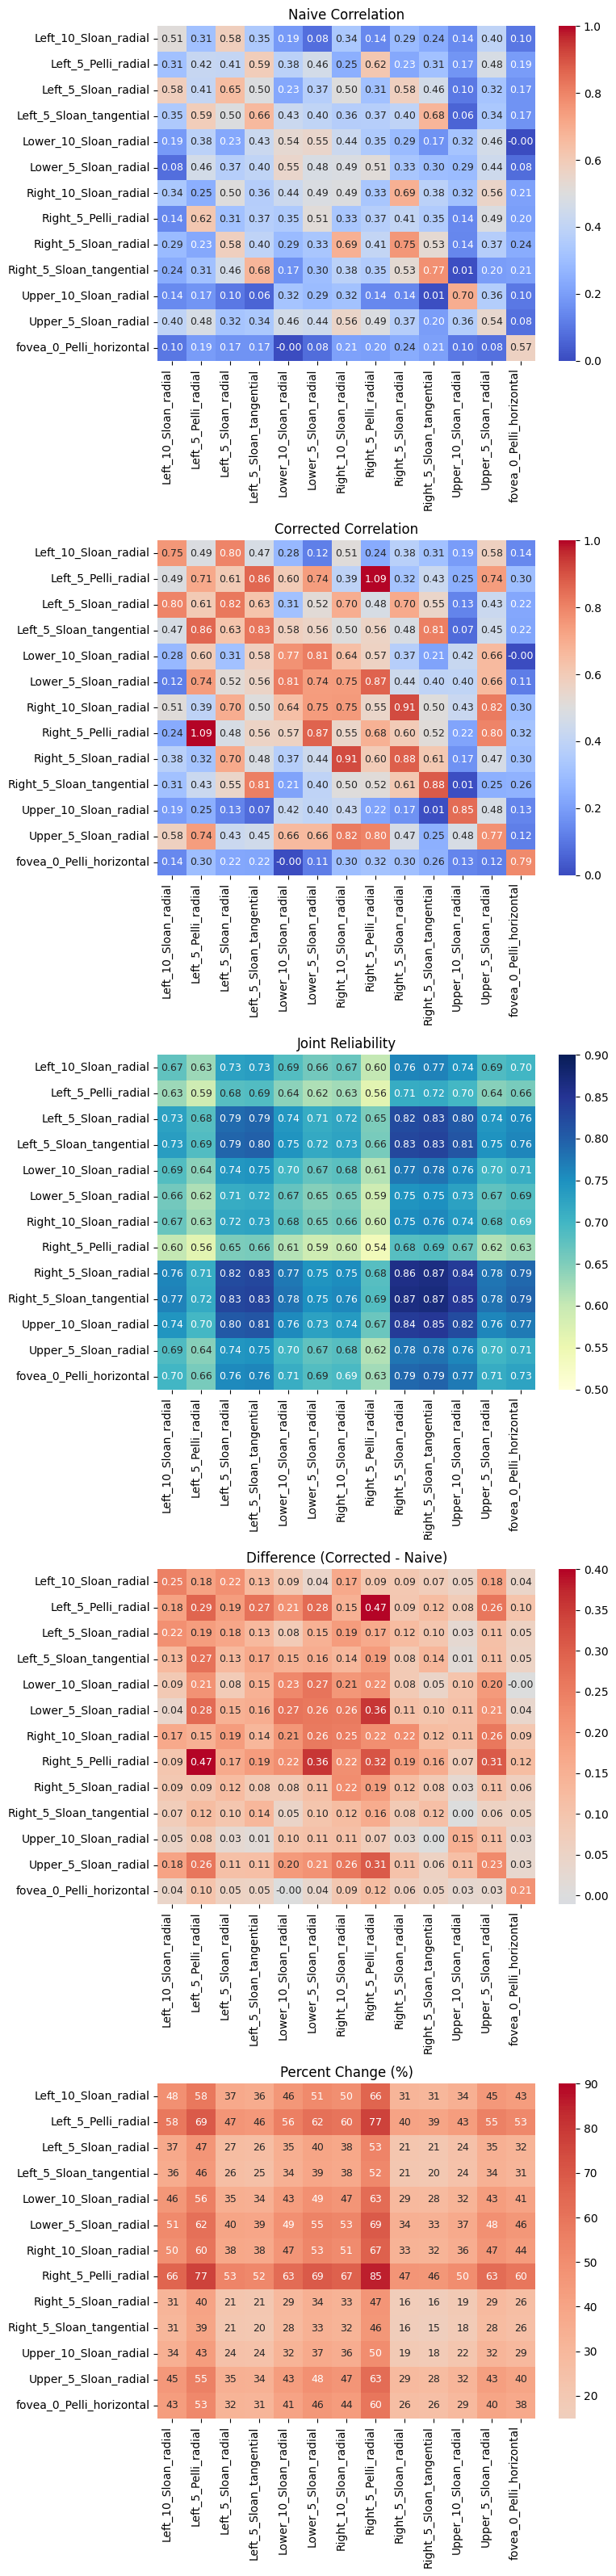

In [33]:
# Extract unique task labels (without session info)
task_labels = sorted(set("_".join(col.split("_")[:-1]) for col in df_logcrowding_wide.columns))

# Prepare to collect matrices
n_tasks = len(task_labels)
naive_corr_matrix = np.zeros((n_tasks, n_tasks))
corrected_corr_matrix = np.zeros((n_tasks, n_tasks))
joint_reliability_matrix = np.zeros((n_tasks, n_tasks))

# For each pair of tasks, compute correlations and reliabilities
for i, task_i in enumerate(task_labels):
    # Get test/retest columns for task_i
    cols_i = [col for col in df_logcrowding_wide.columns if col.startswith(task_i)]
    task_i_measurements = df_logcrowding_wide[cols_i]
    for j, task_j in enumerate(task_labels):
        cols_j = [col for col in df_logcrowding_wide.columns if col.startswith(task_j)]
        task_j_measurements = df_logcrowding_wide[cols_j]
        if i == j:
            naive_corr, corrected_corr, joint_reliability = compute_correlations(task_i_measurements, task_j_measurements, diag = True)
        else:
            naive_corr, corrected_corr, joint_reliability = compute_correlations(task_i_measurements, task_j_measurements, diag = False)
        naive_corr_matrix[i, j] = naive_corr
        corrected_corr_matrix[i, j] = corrected_corr
        joint_reliability_matrix[i, j] = joint_reliability

# Plot the heatmaps
plot_correlation_heatmaps(
    naive_corr_matrix,
    corrected_corr_matrix,
    joint_reliability_matrix,
    task_labels
)